In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
data = pd.read_csv("twitter_training.csv")

In [22]:
data.head(10)

,Topic,Sentiment,Content
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,Borderlands,Positive,im getting into borderlands and i can murder y...
6,Borderlands,Positive,So I spent a few hours making something for fu...
7,Borderlands,Positive,So I spent a couple of hours doing something f...
8,Borderlands,Positive,So I spent a few hours doing something for fun...
9,Borderlands,Positive,So I spent a few hours making something for fu...


In [23]:
data.isna().sum()

Topic          0
Sentiment      0
Content      686
dtype: int64

In [24]:
 data = data.dropna(axis = 0, how="any")

In [25]:
len(data)

73996

In [26]:
data.isna().sum()

Topic        0
Sentiment    0
Content      0
dtype: int64

In [ ]:
data['Topic','Sentiment']

In [29]:
le = LabelEncoder()


In [31]:
encoding_data = [col for col in data if col != 'Content']
for cols in encoding_data:
    print(cols,":\t", data[cols].unique())

Topic :	 ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
Sentiment :	 ['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [32]:
label_encoders={}
for col in encoding_data:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
mapping_dicts = {}
for col in encoding_data:
    le = label_encoders[col]
    mapping_dicts["mapping_dict_" + col] = dict(zip(range(len(le.classes_)), le.classes_))

In [33]:
print("\nMapping Dictionaries:")
for col, mapping_dict in mapping_dicts.items():
    print(col, ":", mapping_dict)


Mapping Dictionaries:
mapping_dict_Topic : {0: 'Amazon', 1: 'ApexLegends', 2: 'AssassinsCreed', 3: 'Battlefield', 4: 'Borderlands', 5: 'CS-GO', 6: 'CallOfDuty', 7: 'CallOfDutyBlackopsColdWar', 8: 'Cyberpunk2077', 9: 'Dota2', 10: 'FIFA', 11: 'Facebook', 12: 'Fortnite', 13: 'Google', 14: 'GrandTheftAuto(GTA)', 15: 'Hearthstone', 16: 'HomeDepot', 17: 'LeagueOfLegends', 18: 'MaddenNFL', 19: 'Microsoft', 20: 'NBA2K', 21: 'Nvidia', 22: 'Overwatch', 23: 'PlayStation5(PS5)', 24: 'PlayerUnknownsBattlegrounds(PUBG)', 25: 'RedDeadRedemption(RDR)', 26: 'TomClancysGhostRecon', 27: 'TomClancysRainbowSix', 28: 'Verizon', 29: 'WorldOfCraft', 30: 'Xbox(Xseries)', 31: 'johnson&johnson'}
mapping_dict_Sentiment : {0: 'Irrelevant', 1: 'Negative', 2: 'Neutral', 3: 'Positive'}


In [57]:
sentiment_counts = data['Sentiment'].map(mapping_dicts['mapping_dict_Sentiment']).value_counts().sort_index()
print(sentiment_counts)

Irrelevant    12875
Negative      22358
Neutral       18108
Positive      20655
Name: Sentiment, dtype: int64


##### Distribution of Topic

In [58]:
palette_color = sns.color_palette('bright')

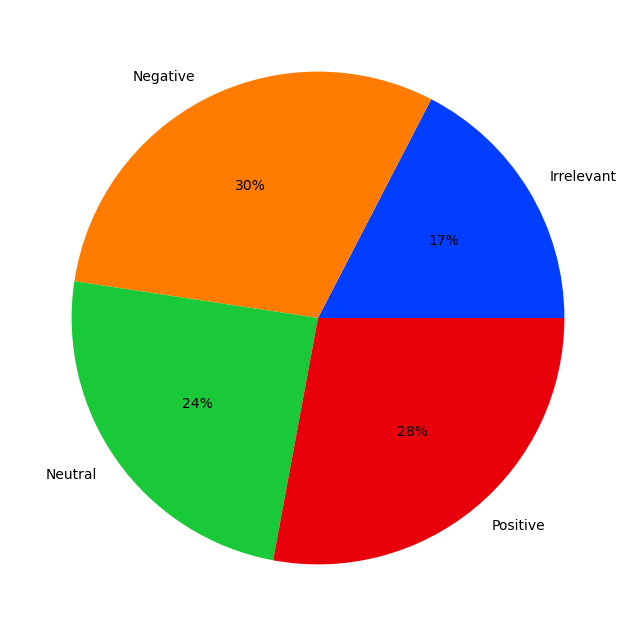

In [59]:
plt.figure(figsize=(15,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=palette_color, autopct='%.000f%%')

plt.show()

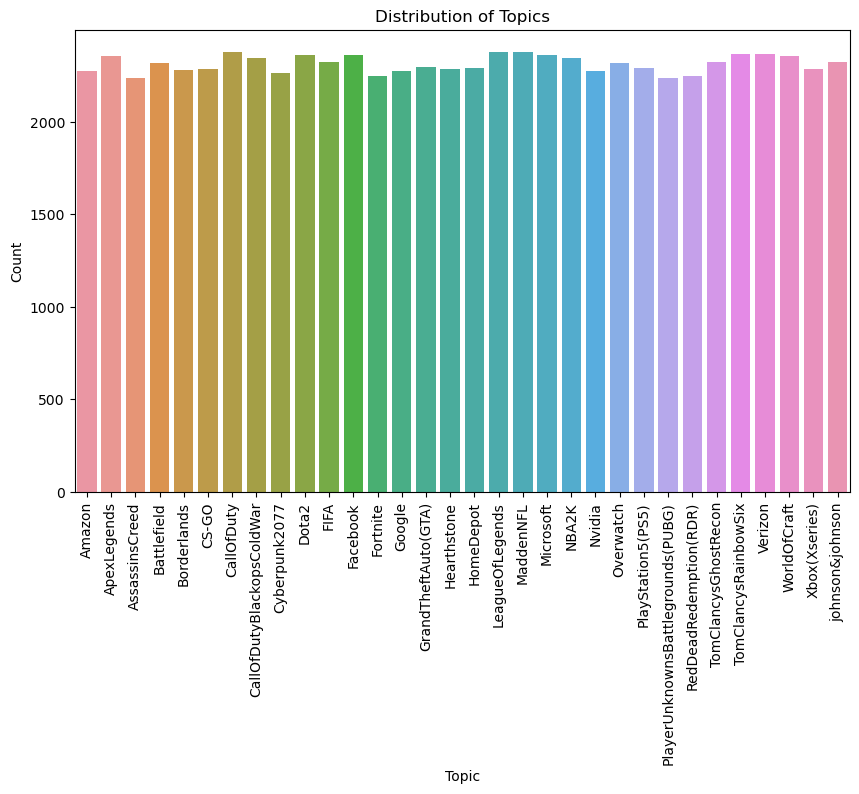

In [73]:
topic_counts = data['Topic'].map(mapping_dicts['mapping_dict_Topic']).value_counts().sort_index()

# Convert the counts to a DataFrame for plotting
topic_counts_df = topic_counts.reset_index()
topic_counts_df.columns = ['Topic', 'Count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Topic', y='Count', data=topic_counts_df)
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [74]:
data.head(10)

,Topic,Sentiment,Content
0,4,3,im getting on borderlands and i will murder yo...
1,4,3,I am coming to the borders and I will kill you...
2,4,3,im getting on borderlands and i will kill you ...
3,4,3,im coming on borderlands and i will murder you...
4,4,3,im getting on borderlands 2 and i will murder ...
5,4,3,im getting into borderlands and i can murder y...
6,4,3,So I spent a few hours making something for fu...
7,4,3,So I spent a couple of hours doing something f...
8,4,3,So I spent a few hours doing something for fun...
9,4,3,So I spent a few hours making something for fu...


In [77]:
X = data.drop(columns=['Sentiment'])
y = data['Sentiment']

In [78]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

In [79]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Training set shape:", X_test.shape, y_test.shape)

Training set shape: (59196, 2) (59196,)
Training set shape: (14800, 2) (14800,)


In [80]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

ValueError: could not convert string to float: "Toronto is Canada's cultural capital, and it's no surprise! If you want to start planning, be sure to check out our autumn 2020 GTA real estate report, which has all the information you need to finally make the move!"

In [83]:
y_pred = logisticreg.predict(X_test)
y_pred

ValueError: could not convert string to float: 'it took me way too fucking long to swap playlists on my alarm app @ google why do you make this so complicated'

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
accuracy = accuracy_score(y_pred, y_test)

NameError: name 'y_pred' is not defined